In [1]:
no_of_hrs = [0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5]
pass_or_not = [0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1]

In [2]:
import numpy as np
import pandas as pd

In [5]:
hrs = pd.Series(no_of_hrs)
pf = pd.Series(pass_or_not)

In [11]:
data = pd.concat([hrs,pf],axis=1)

In [13]:
data

,0,1
0,0.50,0.0
1,0.75,0.0
2,1.00,0.0
3,1.25,0.0
4,1.50,0.0
5,1.75,0.0
6,2.00,1.0
7,2.25,0.0
8,2.50,1.0
9,2.75,0.0


In [15]:
data.rename(columns={0:'hrs',1:'pn'},inplace = True)

In [17]:
import matplotlib.pyplot as plt
import mat

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='hrs', ylabel='pn'>

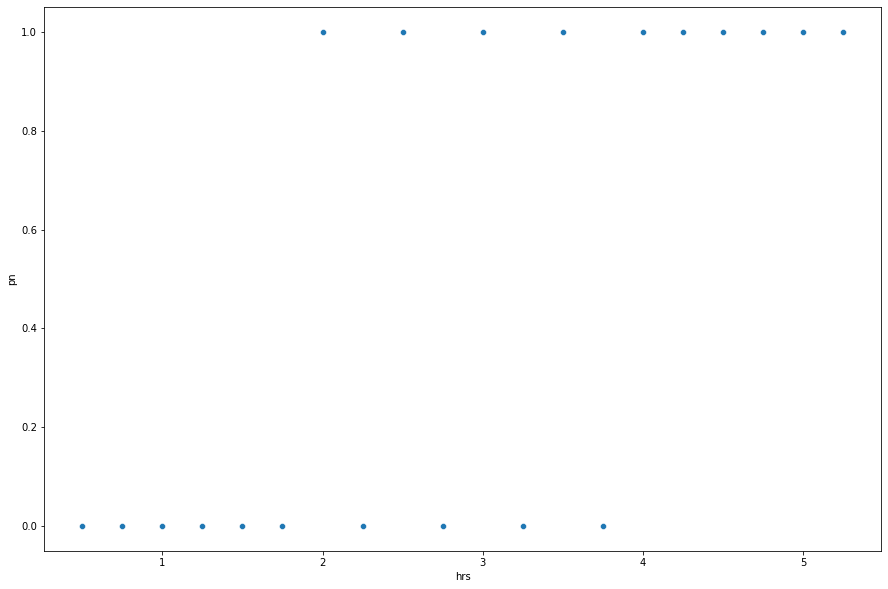

In [19]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='hrs',y='pn', data = data)

In [20]:
from pyforest import*
lazy_imports()

['import fbprophet',
 'from sklearn.manifold import TSNE',
 'from sklearn.model_selection import train_test_split',
 'import gensim',
 'from pathlib import Path',
 'import textblob',
 'import re',
 'import altair as alt',
 'import pydot',
 'from openpyxl import load_workbook',
 'import tensorflow as tf',
 'from sklearn.linear_model import ElasticNetCV',
 'from sklearn.linear_model import LassoCV',
 'import nltk',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import plotly as py',
 'from PIL import Image',
 'from sklearn.impute import SimpleImputer',
 'from sklearn.linear_model import Lasso',
 'from sklearn.cluster import KMeans',
 'from sklearn.linear_model import Ridge',
 'from sklearn.preprocessing import RobustScaler',
 'from dask import dataframe as dd',
 'import statsmodels.api as sm',
 'from sklearn.model_selection import RandomizedSearchCV',
 'from sklearn.model_selection import StratifiedKFold',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'fr

In [24]:
data = pd.read_csv("diabetes.csv")

<IPython.core.display.Javascript object>

In [25]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
data.rename(columns={'Pregnancies':'preg','Glucose':'plas','BloodPressure':'pres','SkinThickness':'skin','Insulin':'test','BMI':'mass','DiabetesPedigreeFunction':'pedi','Age':'age','Outcome':'class'}, inplace = True)

In [29]:
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
data.isnull().values.any()

False

In [34]:
columns = list(data)[0:-1]

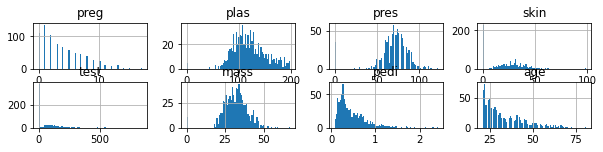

In [37]:
data[columns].hist(bins=80, figsize=(10,15), layout = (14,4));

In [38]:
data.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(close=None, block=None)>

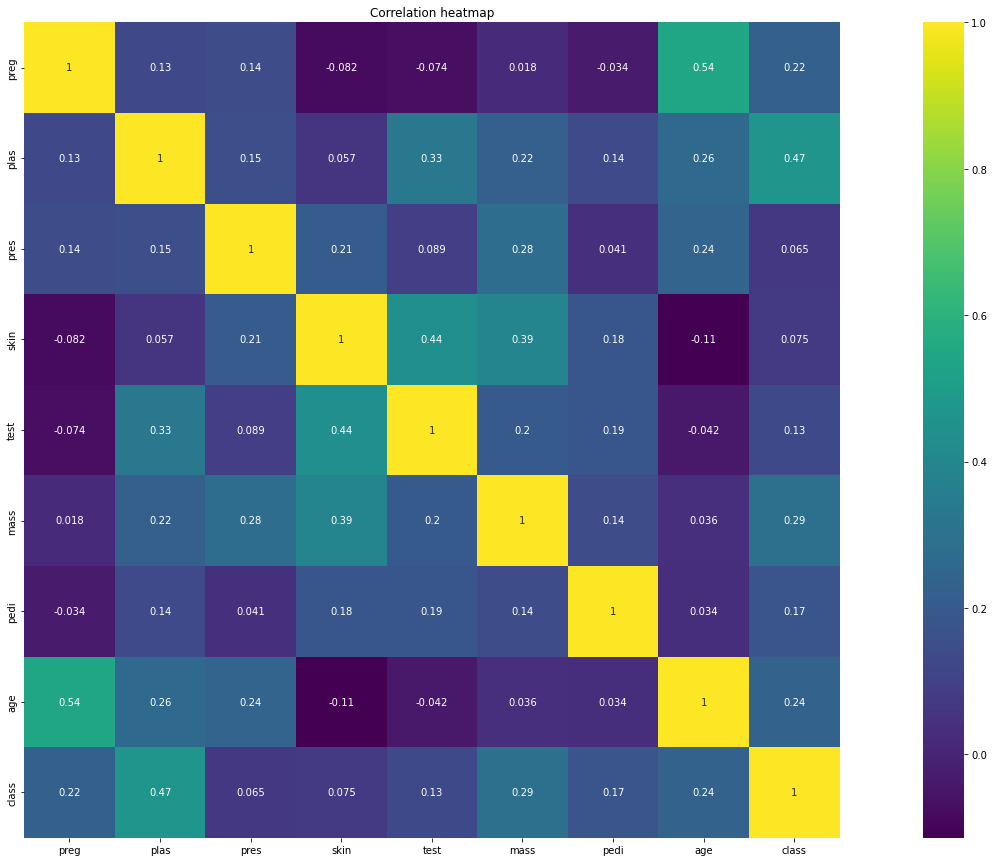

In [41]:
plt.figure(figsize=(30,15))
sns.heatmap(data.corr(), vmax = 1, square = True, annot = True, cmap = 'viridis')
plt.title('Correlation heatmap')
plt.show

<IPython.core.display.Javascript object>

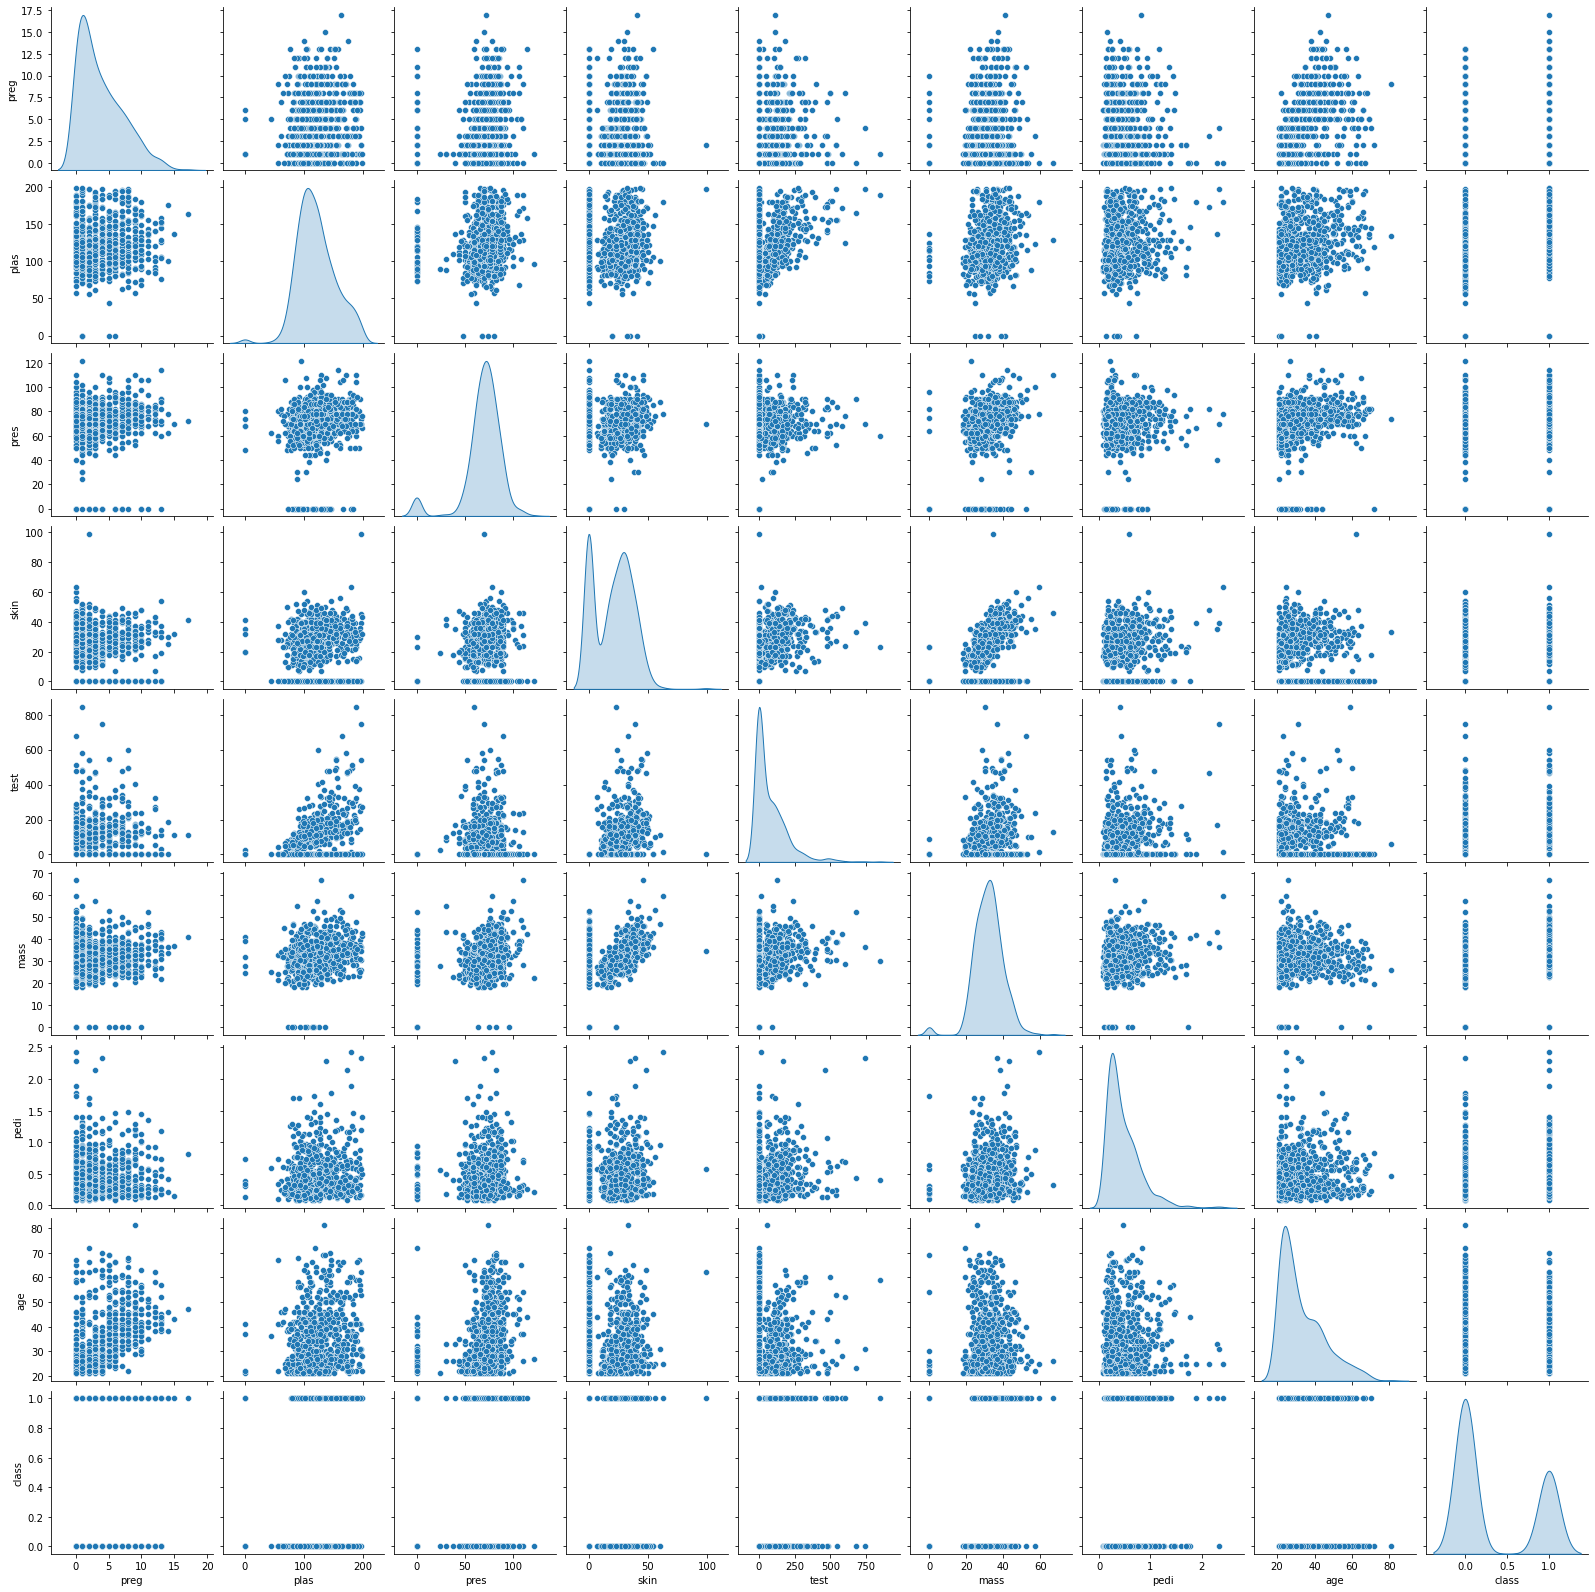

In [42]:
sns.pairplot(data,diag_kind = 'kde')

In [44]:
data['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x = data.drop('class', axis = 1)
y = data['class']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

In [47]:
 x_train.head()

,preg,plas,pres,skin,test,mass,pedi,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


In [48]:
#replace zeros with mean

from sklearn.impute import SimpleImputer

replace_ = SimpleImputer(missing_values = 0, strategy = 'mean')
cols = x_train.columns

x_train = pd.DataFrame(replace_.fit_transform(x_train))
x_test = pd.DataFrame(replace_.fit_transform(x_train))
x_train.columns = cols
x_test.columns = cols

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
x_train.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0


In [52]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [55]:
model = LogisticRegression(solver = 'liblinear')
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [57]:
y_predict = model.predict(x_test)
y_predict

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [64]:
cm = metrics.confusion_matrix(y_test, y_predict, labels=[1,0])

df_cm = pd.DataFrame(cm, index= [i for i in["1","0"]],
                     columns = [i for i in["predict_1","predict_0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True)

ValueError: Found input variables with inconsistent numbers of samples: [231, 537]